In [7]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)

df = pd.read_csv("/content/project_data.csv")


In [8]:
print(df.dtypes)

SEQN                            int64
depression                      int64
Used Drugs                    float64
height(in)                      int64
weight(pound)                   int64
has diabetes?                   int64
#people in family               int64
ALQ120Q                       float64
alc_drinks_perday             float64
5_drinks_perday/ALQ150        float64
Gender                          int64
Age                             int64
Educationlevel                  int64
maritalStatus                   int64
INDFMPIR/Poverty threshold    float64
dtype: object


In [9]:
df.head(10)

,SEQN,depression,Used Drugs,height(in),weight(pound),has diabetes?,#people in family,ALQ120Q,alc_drinks_perday,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold
0,41475,0,2.0,62,308,2,2,0.0,NaN,2.0,2,62,3,1,1.83
1,41477,0,NaN,68,190,1,2,0.0,NaN,2.0,1,71,3,1,1.50
2,41479,0,2.0,67,142,2,5,3.0,5.0,2.0,1,52,1,1,2.20
3,41481,0,2.0,73,175,2,4,3.0,4.0,2.0,1,21,3,5,1.63
4,41482,1,9.0,68,228,2,6,1.0,4.0,1.0,1,64,2,1,4.01
5,41483,0,2.0,71,289,1,3,0.0,NaN,2.0,1,66,4,1,1.14
6,41485,1,2.0,63,138,2,5,NaN,NaN,NaN,2,30,2,1,1.01
7,41486,0,2.0,64,187,2,3,NaN,NaN,NaN,2,61,1,1,1.75
8,41487,0,2.0,68,150,2,1,1.0,1.0,2.0,1,27,5,5,5.00
9,41489,0,2.0,63,200,2,3,3.0,5.0,2.0,2,40,3,1,2.15


# Check % of Null values in each column

In [10]:
# calculate percentage of missing values in each column
missing_pct = df.isna().mean() * 100

print(missing_pct)

SEQN                           0.000000
depression                     0.000000
Used Drugs                    18.959173
height(in)                     0.000000
weight(pound)                  0.000000
has diabetes?                  0.000000
#people in family              0.000000
ALQ120Q                       22.305940
alc_drinks_perday             41.773261
5_drinks_perday/ALQ150        22.305940
Gender                         0.000000
Age                            0.000000
Educationlevel                 0.000000
maritalStatus                  0.000000
INDFMPIR/Poverty threshold     9.286841
dtype: float64


In [11]:
# Dropping column alc_drinks_perday as it has more than 40% null values
df = df.drop('alc_drinks_perday',axis=1)

In [12]:
df.shape

(5707, 14)

# Check and drop Duplicates in the dataframe

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(5707, 14)

# Cleaning SEQN column

**Rename the sequence number to person. This is a unique identifier of a person**



In [15]:
df=df.rename(columns={"SEQN": "Person"})

# Cleaning of Age column

In [16]:
df['Age'].describe()

count    5707.000000
mean       51.196776
std        29.869115
min        20.000000
25%        36.000000
50%        50.000000
75%        65.000000
max      1300.000000
Name: Age, dtype: float64

<Axes: >

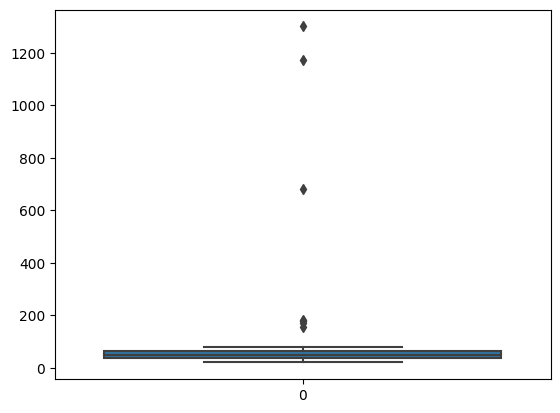

In [17]:
sns.boxplot(df['Age'])

In [18]:
# calculate the IQR of 'Age'
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# identify outliers in 'Age'
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

In [19]:
df= df[(df['Age'] < upper_bound) & (df['Age'] > lower_bound)]

<Axes: xlabel='Age'>

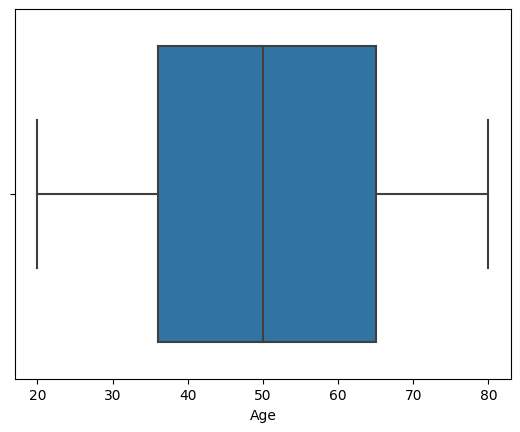

In [20]:
sns.boxplot(x=df['Age'])

# Cleaning of depression column

**In the depression column, set the values with 2 or 3 to 1. The final output will have either 0 (No) or 1 (yes)**

In [21]:
df.loc[(df['depression'] == 1) | (df['depression'] == 2) | (df['depression'] == 3), 'depression'] = 1
null_values = df['depression'].isnull().sum()
print(null_values)


0


**In the depression column, drop the rows with values 7 and 9 as it does not contribute any value to the process**

In [22]:
#dropping rows where depression is equal to 7 or 9
depression_drop = df[(df['depression'] == 7) | (df['depression'] == 9) ].index
df.drop(depression_drop , inplace=True)

In [23]:
df.shape

(5696, 14)

In [24]:
df = df.reset_index(drop=True)
df.head(10)

,Person,depression,Used Drugs,height(in),weight(pound),has diabetes?,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold
0,41475,0,2.0,62,308,2,2,0.0,2.0,2,62,3,1,1.83
1,41477,0,NaN,68,190,1,2,0.0,2.0,1,71,3,1,1.50
2,41479,0,2.0,67,142,2,5,3.0,2.0,1,52,1,1,2.20
3,41481,0,2.0,73,175,2,4,3.0,2.0,1,21,3,5,1.63
4,41482,1,9.0,68,228,2,6,1.0,1.0,1,64,2,1,4.01
5,41483,0,2.0,71,289,1,3,0.0,2.0,1,66,4,1,1.14
6,41485,1,2.0,63,138,2,5,NaN,NaN,2,30,2,1,1.01
7,41486,0,2.0,64,187,2,3,NaN,NaN,2,61,1,1,1.75
8,41487,0,2.0,68,150,2,1,1.0,2.0,1,27,5,5,5.00
9,41489,0,2.0,63,200,2,3,3.0,2.0,2,40,3,1,2.15


# Cleaning of 'Used Drugs' column.
1. Drop rows with values 7,9,null
2. Update the value 2 to 0

In [25]:
#dropping rows where Drugs consumed is equal to 7 or 9
drugs_drop = df[(df['Used Drugs'] == 7) | (df['Used Drugs'] == 9) | df['Used Drugs'].isnull() ].index
df.drop(drugs_drop , inplace=True)

In [26]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['Used Drugs'] == 2, 'Used Drugs'] = 0

In [27]:

#df.loc[(df['Used Drugs'] == 1) | (df['depression'] == 2) | (df['depression'] == 3), 'depression'] = 1
null_values = df['Used Drugs'].isnull().sum()
print(null_values)


0


In [28]:
df.shape

(4590, 14)

# Calculating BMI from height and weight columns

BMI = Weight / (Height ** 2)

Convert the Weight into Kg and Height into meters

In [29]:
#dropping rows where height and weigt are null or 0
drop_records = df[df['height(in)'].isnull() | df['height(in)'] == 0].index
df.drop(drop_records , inplace=True)

drop_records = df[df['weight(pound)'].isnull()| df['weight(pound)'] == 0].index
df.drop(drop_records , inplace=True)


In [30]:
# convert height from inches to meters
df['height_m'] = df['height(in)'] * 0.0254

# convert weight from pounds to kilograms
df['weight_kg'] = df['weight(pound)'] * 0.45359237

In [31]:
# calculate the BMI
df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2)

In [32]:
# drop height and weight columns from data frame
df = df.drop('height(in)', axis=1)
df = df.drop('weight(pound)',axis=1)

In [33]:
df = df.drop('height_m', axis=1)
df = df.drop('weight_kg',axis=1)

In [34]:
import seaborn as sns

<ipython-input-35-edfa99916838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

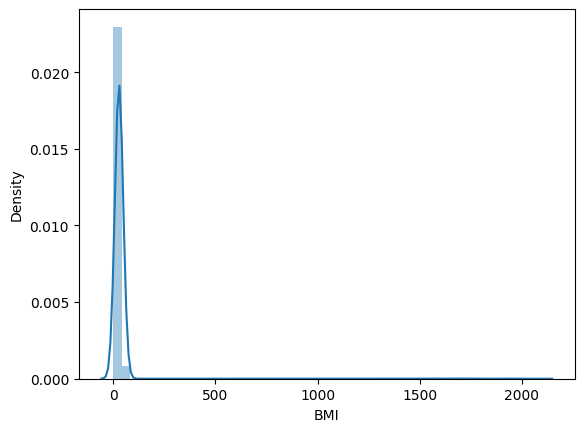

In [35]:
sns.distplot(df['BMI'])

In [36]:
df['BMI'].describe()

count    4494.000000
mean       34.706702
std       105.122199
min         0.000584
25%        23.932669
50%        27.397229
75%        31.647869
max      2089.771916
Name: BMI, dtype: float64

<Axes: >

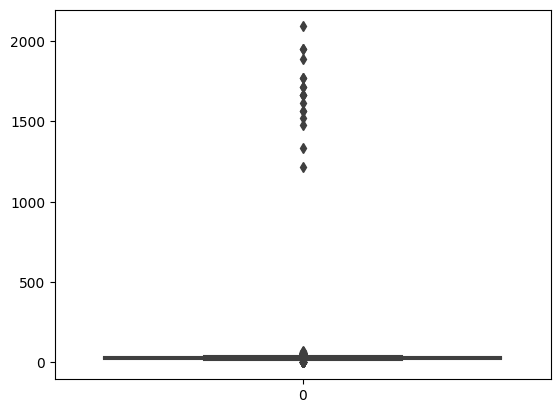

In [37]:
sns.boxplot(df['BMI'])

In [38]:
# calculate the IQR of 'column1'
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1

# identify outliers in 'column1'
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.loc[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]


In [39]:
df= df[(df['BMI'] < upper_bound) & (df['BMI'] > lower_bound)]

In [40]:
# sns.boxplot(df['BMI'])

<ipython-input-41-edfa99916838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

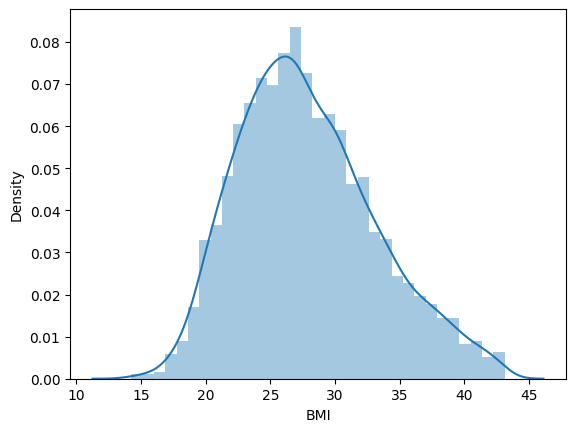

In [41]:
sns.distplot(df['BMI'])

In [42]:
df.shape

(4292, 13)

In [43]:
df.head()

,Person,depression,Used Drugs,has diabetes?,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
2,41479,0,0.0,2,5,3.0,2.0,1,52,1,1,2.20,22.240116
3,41481,0,0.0,2,4,3.0,2.0,1,21,3,5,1.63,23.088230
5,41483,0,0.0,1,3,0.0,2.0,1,66,4,1,1.14,40.306905
6,41485,1,0.0,2,5,NaN,NaN,2,30,2,1,1.01,24.445352
7,41486,0,0.0,2,3,NaN,NaN,2,61,1,1,1.75,32.098147


# Cleaning of 'has diabetes?' column

1. Update the value 3 as 1
2. Remove rows with values 7 or 9
3. Update the value 2 as 0
4. Rename the column to 'isDiabetic'

In [44]:
df.loc[(df['has diabetes?'] == 3) , 'has diabetes?'] = 1
#dropping rows where value is equal to 7 or 9
diabetes_drop = df[(df['has diabetes?'] == 7) | (df['has diabetes?'] == 9) | df['has diabetes?'].isnull() ].index
df.drop(diabetes_drop , inplace=True)


In [45]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['has diabetes?'] == 2, 'has diabetes?'] = 0

In [46]:
# Rename the column name to 'isDiabetic'
df = df.rename(columns={'has diabetes?': 'isDiabetic'})

In [47]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
2,41479,0,0.0,0,5,3.0,2.0,1,52,1,1,2.20,22.240116
3,41481,0,0.0,0,4,3.0,2.0,1,21,3,5,1.63,23.088230
5,41483,0,0.0,1,3,0.0,2.0,1,66,4,1,1.14,40.306905
6,41485,1,0.0,0,5,NaN,NaN,2,30,2,1,1.01,24.445352
7,41486,0,0.0,0,3,NaN,NaN,2,61,1,1,1.75,32.098147


# Cleaning of 5_drinks_perday column

Values: 1 - Yes, 2 - No

1. Remove rows with values 7,9,null 
2. Update 2 as 0
3. Rename the column name to "isAlcoholic"


In [48]:
# Rename the column name to 'isAlcoholic'
df = df.rename(columns={'5_drinks_perday/ALQ150': 'isAlcoholic'})

In [49]:
#dropping rows where value is 7 or 9
isAlcoholic_v = df[df['isAlcoholic'].isnull() | (df['isAlcoholic']==7) | (df['isAlcoholic']==9)].index
df.drop(isAlcoholic_v , inplace=True)

In [50]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['isAlcoholic'] == 2, 'isAlcoholic'] = 0

In [51]:
df = df.reset_index(drop=True)
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,ALQ120Q,isAlcoholic,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
0,41479,0,0.0,0,5,3.0,0.0,1,52,1,1,2.20,22.240116
1,41481,0,0.0,0,4,3.0,0.0,1,21,3,5,1.63,23.088230
2,41483,0,0.0,1,3,0.0,0.0,1,66,4,1,1.14,40.306905
3,41487,0,0.0,0,1,1.0,0.0,1,27,5,5,5.00,22.807188
4,41489,0,0.0,0,3,3.0,0.0,2,40,3,1,2.15,35.428046


In [52]:
df.shape

(3441, 13)

In [53]:
# Dropping column ALQ120Q as it is not required
df = df.drop('ALQ120Q',axis=1)

# Cleaning EducationLevel column

1. Renaming it to 'CompletedHighSchool'
2. Setting values to 1 or 0 accordingly

In [54]:
df=df.rename(columns={"Educationlevel": "CompletedHighSchool"})



In [55]:
df.loc[(df['CompletedHighSchool'] <= 2), 'CompletedHighSchool'] = 0
df.loc[(df['CompletedHighSchool'] >= 3), 'CompletedHighSchool'] = 1



In [56]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,INDFMPIR/Poverty threshold,BMI
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116
1,41481,0,0.0,0,4,0.0,1,21,1,5,1.63,23.088230
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905
3,41487,0,0.0,0,1,0.0,1,27,1,5,5.00,22.807188
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046


# Cleaning maritalStatus column

1. Drop rows with values 77 or 99
2. Group 2, 3, 4 to 2 (widowed, seperated, Divorced)
3. Group 5, 6 and update it to 0 (never married)

In [57]:
#dropping rows where value is equal to 77 or 99
marital_drop = df[ (df['maritalStatus'] == 99) | (df['maritalStatus'] == 77) | df['maritalStatus'].isnull() ].index
df.drop(marital_drop , inplace=True)

In [58]:
# Group 2, 3, 4 to 2
df.loc[(df['maritalStatus'] == 3) | (df['maritalStatus'] == 4) , 'maritalStatus'] = 2

# Group 5, 6 to 0 
df.loc[(df['maritalStatus'] == 5) | (df['maritalStatus'] == 6) , 'maritalStatus'] = 0

In [59]:
print(df['maritalStatus'].unique())

[1 0 2]


# Cleaning Family Size column 

1. Rename the column to familySize
2. if value = 1 then Single
      value = 2,3,4 then Small
      value = 5,6,7 then Big

In [60]:
# get the count of distinct values in 'column1'
distinct_count = df['#people in family'].value_counts()
print(distinct_count)

2    869
1    669
3    648
4    581
5    343
6    172
7    158
Name: #people in family, dtype: int64


In [61]:
# df=df.rename(columns={"#people in family": "familySize"})

In [62]:
df['familySize'] = df['#people in family']

In [63]:
df.loc[df['familySize'] == 1, 'familySize'] = 'Single'

In [64]:
df.loc[((df['familySize']) == 2) | ((df['familySize']) ==3) | ((df['familySize']) ==4), 'familySize'] = 'Small'

In [65]:
df.loc[((df['familySize']) == 5) | ((df['familySize']) ==6) | ((df['familySize']) ==7), 'familySize'] = 'Big'

In [66]:
# get the count of distinct values in 'column1'
distinct_count = df['familySize'].value_counts()
print(distinct_count)

Small     2098
Big        673
Single     669
Name: familySize, dtype: int64


In [67]:
df.shape

(3440, 13)

In [68]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,INDFMPIR/Poverty threshold,BMI,familySize
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small


# Cleaning poverty threshold column and creating a new column based on it

1. Create a new column 'finStatus' based on poverty threshold column

In [69]:
# Renaming column INDFMPIR/Poverty threshold to povertyThreshold

df=df.rename(columns={"INDFMPIR/Poverty threshold": "povertyThreshold"})

In [70]:
df['povertyThreshold'].describe()

count    3183.000000
mean        2.690440
std         1.675414
min         0.000000
25%         1.180000
50%         2.350000
75%         4.640000
max         5.000000
Name: povertyThreshold, dtype: float64

<Axes: xlabel='povertyThreshold'>

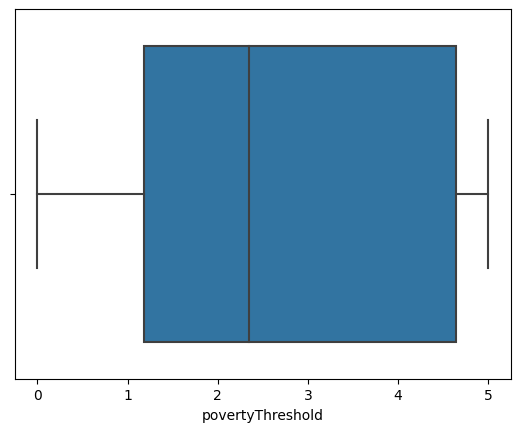

In [71]:
sns.boxplot(x=df['povertyThreshold'])

In [72]:
# define a function to categorize the financial status of an individual
def categorize_finStatus(value):
    if  value <= 2:
        return 'Poor'
    elif value > 2 and value < 4:
        return 'Middle class'
    elif value >= 4 and value <= 5:
        return 'Rich'
    else:
        return None

In [73]:
# apply the categorize function to the 'values' column of the dataframe
df['finStatus'] = df['povertyThreshold'].apply(categorize_finStatus)


In [74]:
distinct_count = df['finStatus'].value_counts()
print(distinct_count)

Poor            1415
Rich             980
Middle class     788
Name: finStatus, dtype: int64


In [75]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big,Middle class
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small,Poor
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small,Poor
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single,Rich
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small,Middle class


# Assigning weight category based on BMI

1. If BMI is less than 18.5, it falls within the underweight range.
2. If BMI is 18.5 to <25, it falls within the healthy weight range.
3. If BMI is 25.0 to <30, it falls within the overweight range.
4. If BMI is 30.0 or higher, it falls within the obesity range.

In [76]:
def categorize_weight(value):
  if value < 18.5:
    return "Under Weight"
  elif value >= 18.5 and value < 25:
    return "Healthy"
  elif value >= 25 and value < 30:
    return "Overweight"
  elif value >=30:
    return "Obese"

In [77]:
df['weightCategory'] = df['BMI'].apply(categorize_weight)

In [78]:
print(df['weightCategory'].value_counts())

Overweight      1246
Obese           1102
Healthy         1045
Under Weight      47
Name: weightCategory, dtype: int64


In [79]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus,weightCategory
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big,Middle class,Healthy
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small,Poor,Healthy
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small,Poor,Obese
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single,Rich,Healthy
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small,Middle class,Obese


In [80]:
print(df.dtypes)

Person                   int64
depression               int64
Used Drugs             float64
isDiabetic               int64
#people in family        int64
isAlcoholic            float64
Gender                   int64
Age                      int64
CompletedHighSchool      int64
maritalStatus            int64
povertyThreshold       float64
BMI                    float64
familySize              object
finStatus               object
weightCategory          object
dtype: object


# Updating gender values to male or female as it will be easy to categorize

In [81]:
df.loc[df['Gender'] == 1, 'Gender'] = 'Male'
df.loc[df['Gender'] == 2, 'Gender'] = 'Female'

In [82]:
df.sample(5)

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus,weightCategory
765,43776,0,1.0,0,2,1.0,Male,48,1,0,5.00,39.155134,Small,Rich,Obese
576,43224,1,0.0,0,2,0.0,Female,42,1,1,3.57,34.260059,Small,Middle class,Obese
1565,46053,1,1.0,0,1,1.0,Male,39,1,0,1.47,26.446483,Single,Poor,Overweight
3122,50777,0,1.0,0,5,1.0,Male,35,0,1,0.50,25.544050,Big,Poor,Overweight
1137,44815,0,0.0,0,1,0.0,Female,21,1,0,0.71,22.709978,Single,Poor,Healthy


In [83]:
#dropping rows where Drugs consumed is equal to 7 or 9
drop_records = df[df['weightCategory'].isnull() ].index
df.drop(drop_records , inplace=True)

In [84]:
df = df.reset_index(drop=True)

In [85]:
df.to_csv("/content/sample_data/cleaned_data.csv")

# Exploratory Data Analysis

In [86]:
df[['#people in family','Age','BMI','povertyThreshold']].describe(include='all')
# df.describe()

,#people in family,Age,BMI,povertyThreshold
count,3440.000000,3440.000000,3440.000000,3183.000000
mean,3.060465,44.634884,27.925146,2.690440
std,1.667421,14.049257,5.288216,1.675414
min,1.000000,20.000000,14.248736,0.000000
25%,2.000000,33.000000,24.140892,1.180000
50%,3.000000,45.000000,27.341595,2.350000
75%,4.000000,57.000000,31.247537,4.640000
max,7.000000,69.000000,43.120420,5.000000


In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

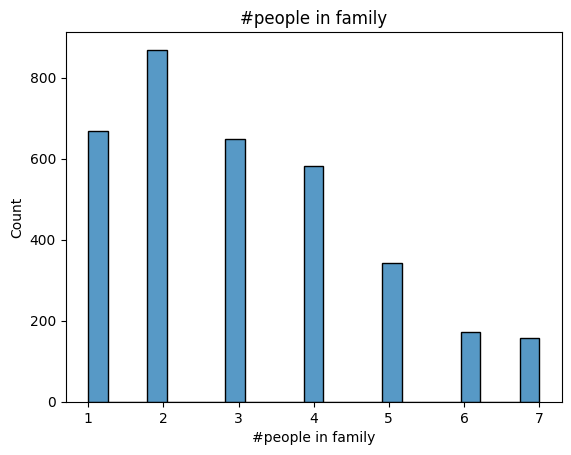

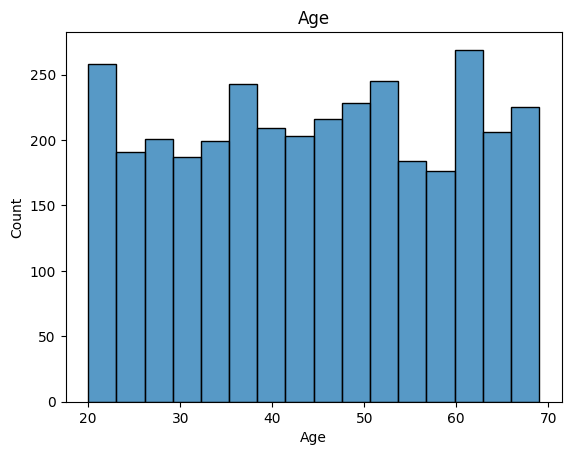

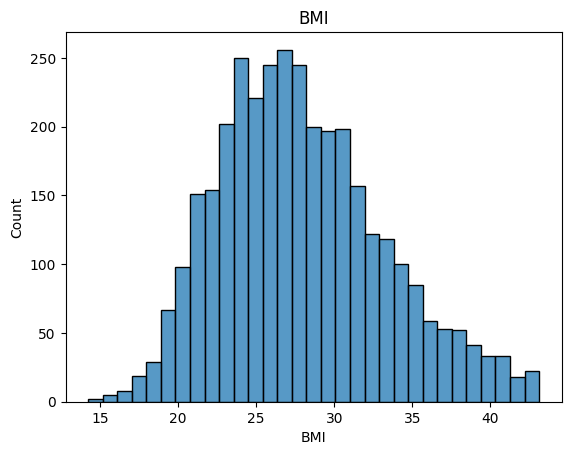

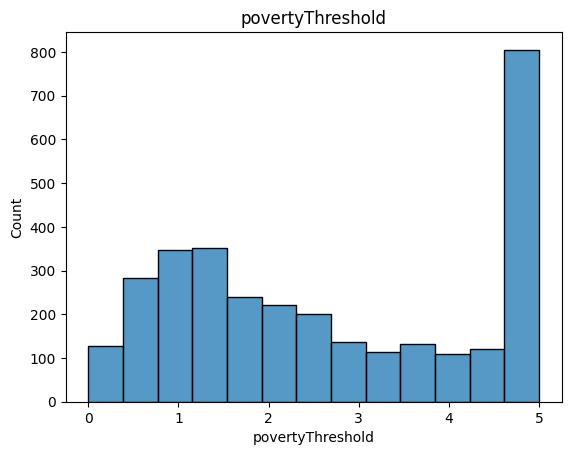

In [88]:
# Univariate analysis of numeric variables
num_vars = ['#people in family','Age','BMI','povertyThreshold']
for var in num_vars:
    sns.histplot(df[var])
    plt.title(var)
    plt.show()

# Univariate analysis of categorical data

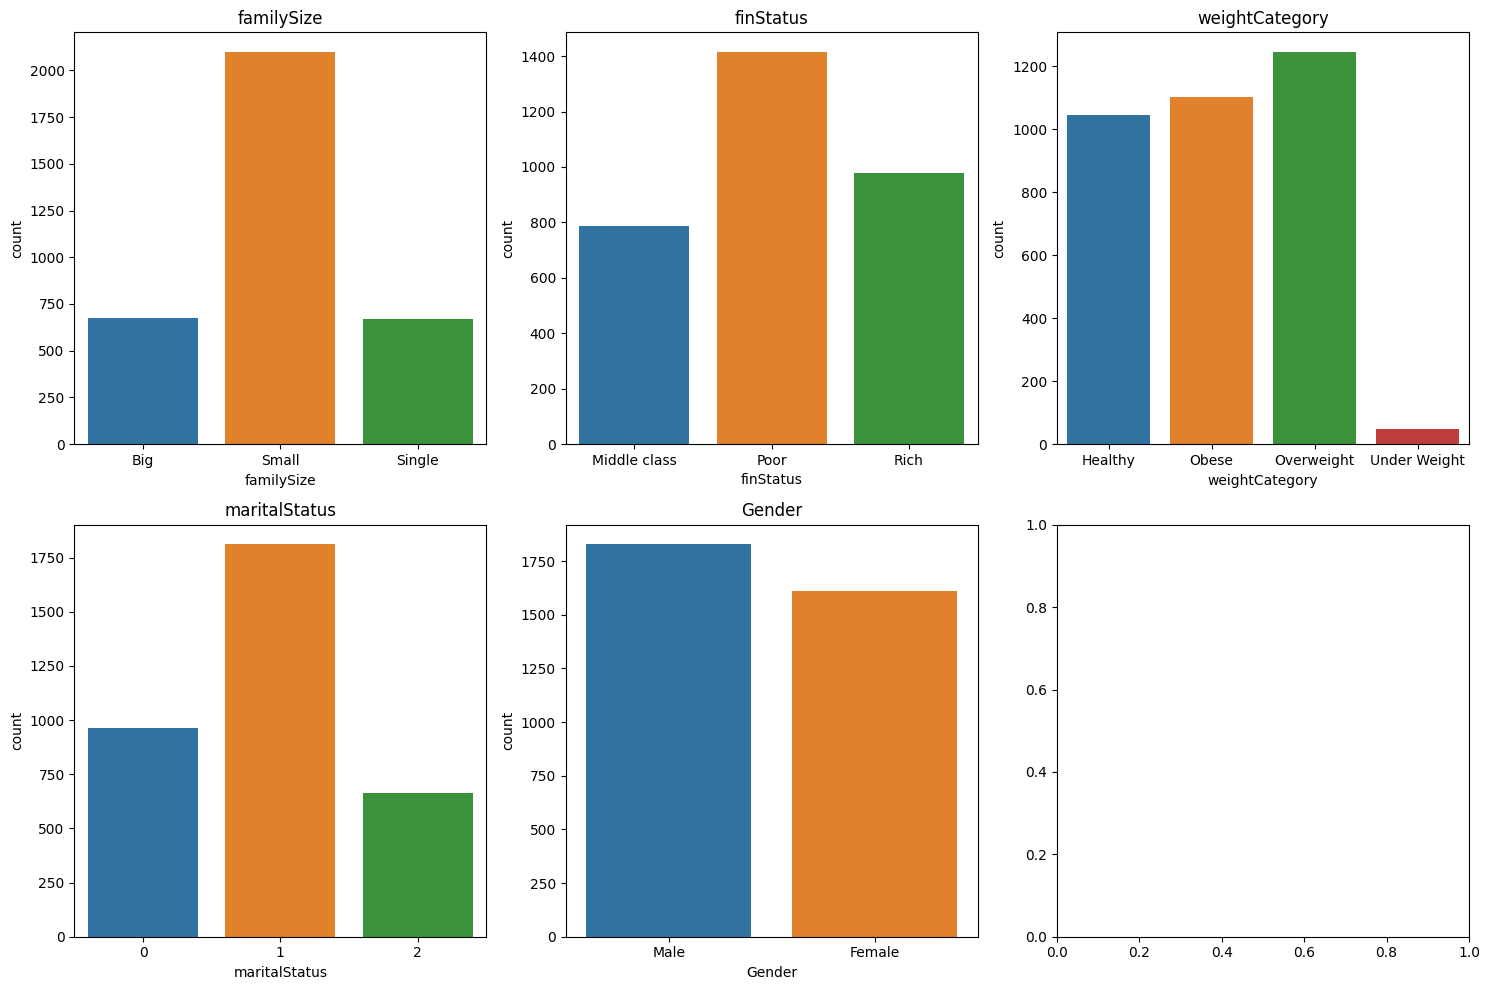

In [89]:
cat_vars = ['familySize', 'finStatus', 'weightCategory', 'maritalStatus', 'Gender']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [90]:
# remove missing values from column A
df.dropna(subset=['finStatus'], inplace=True)

# Bivariate Analysis (categorical vs Numerical)

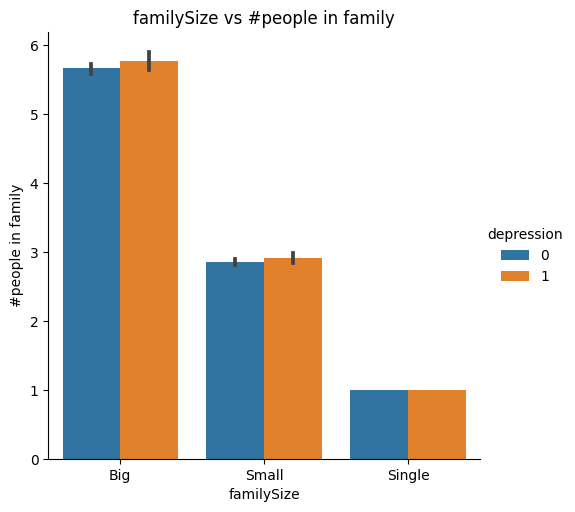

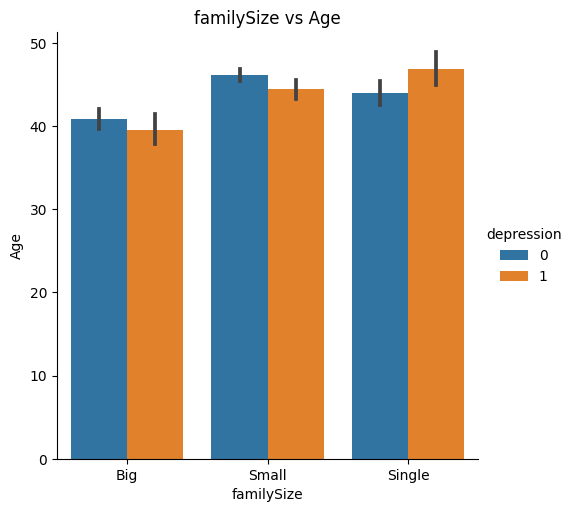

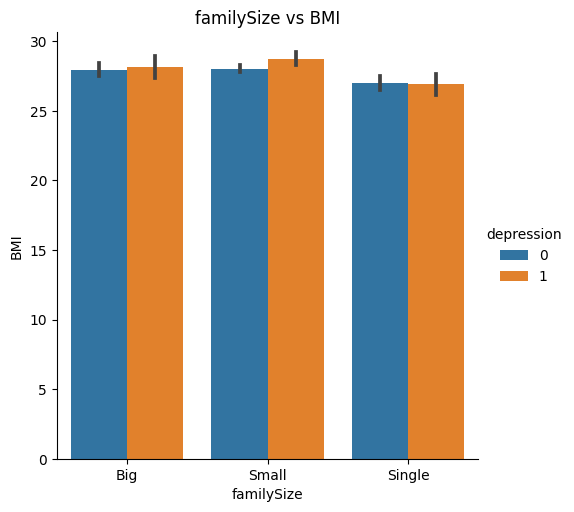

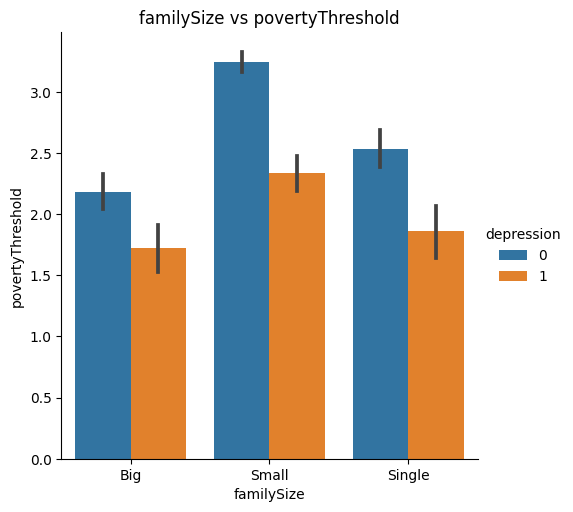

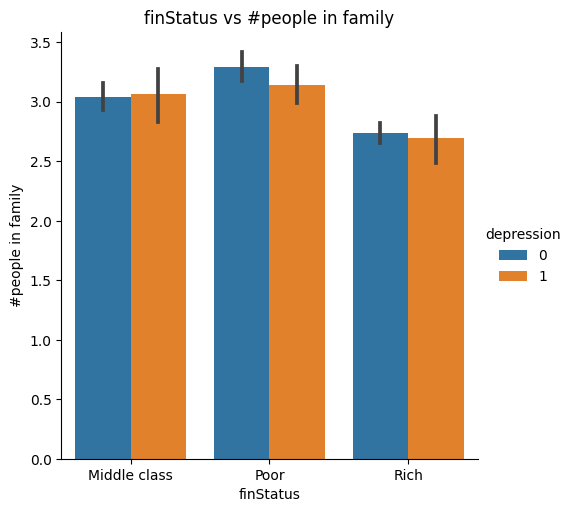

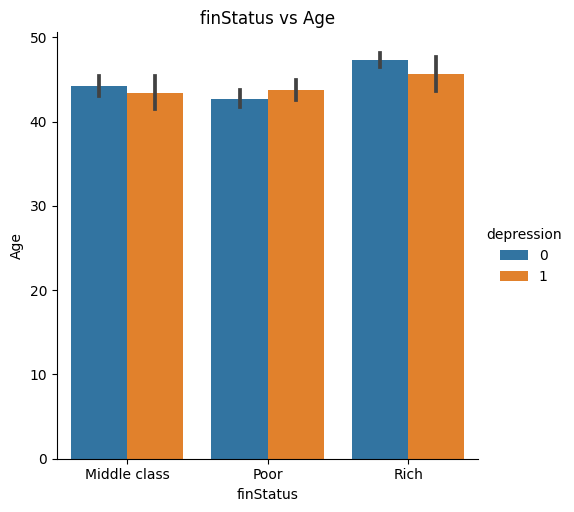

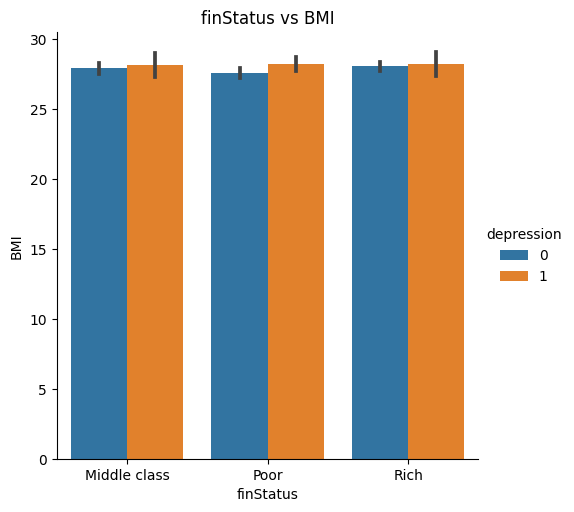

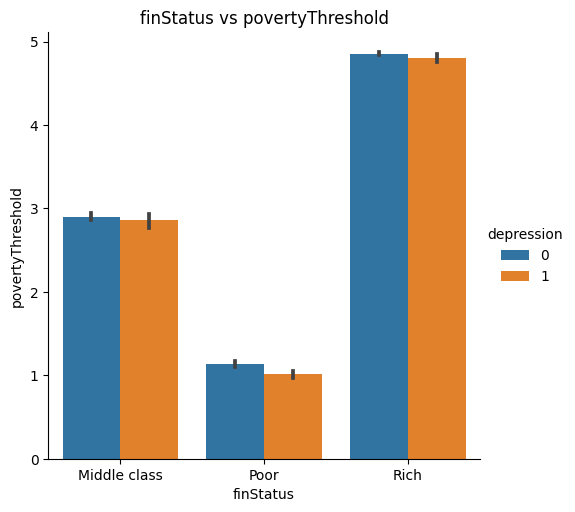

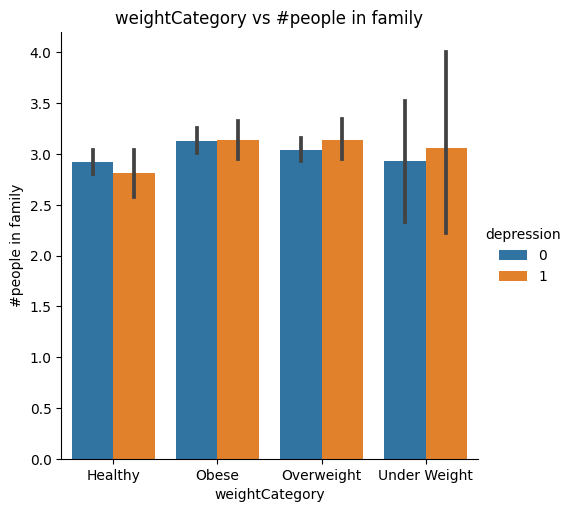

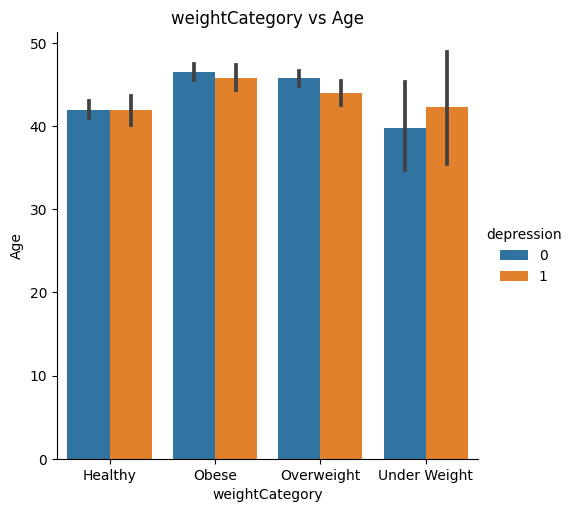

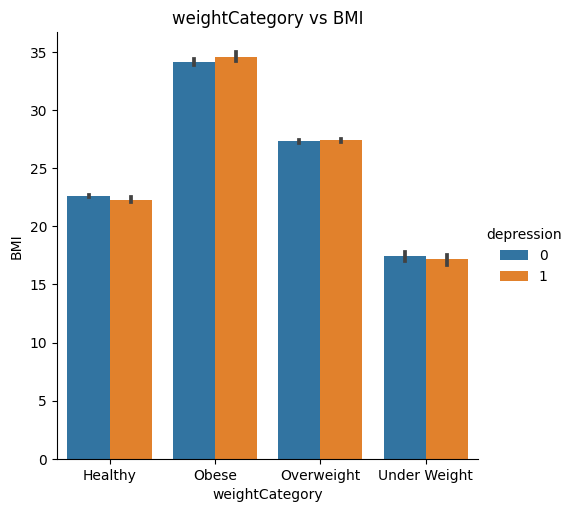

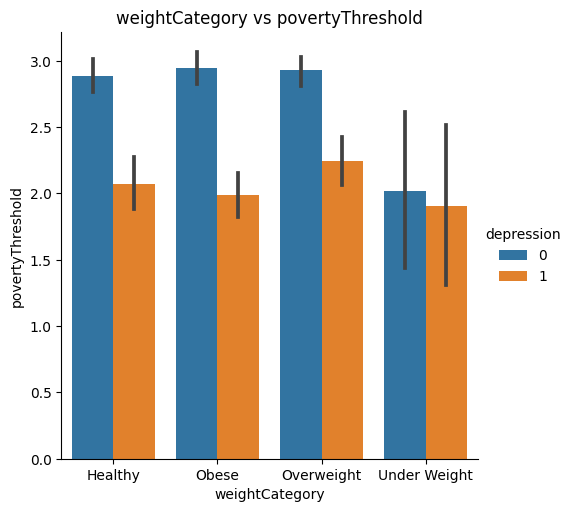

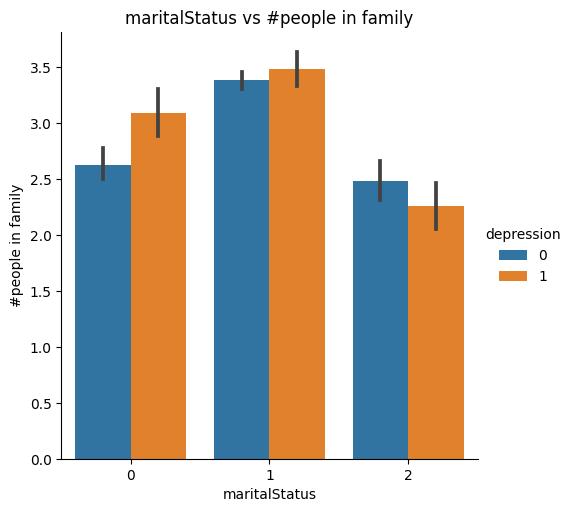

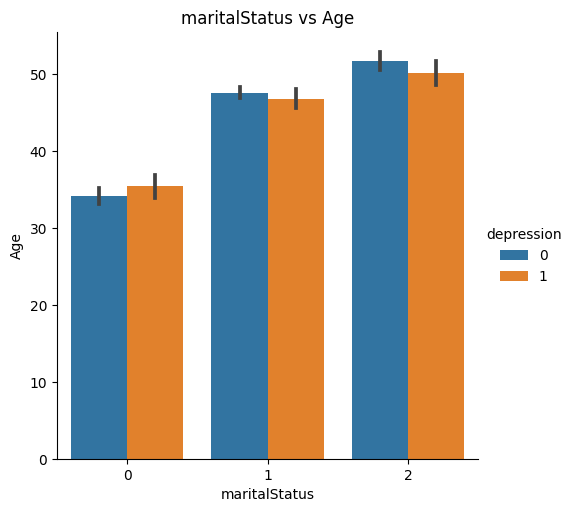

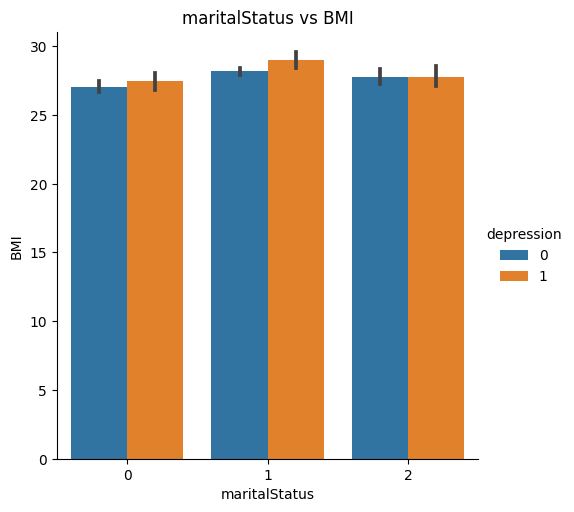

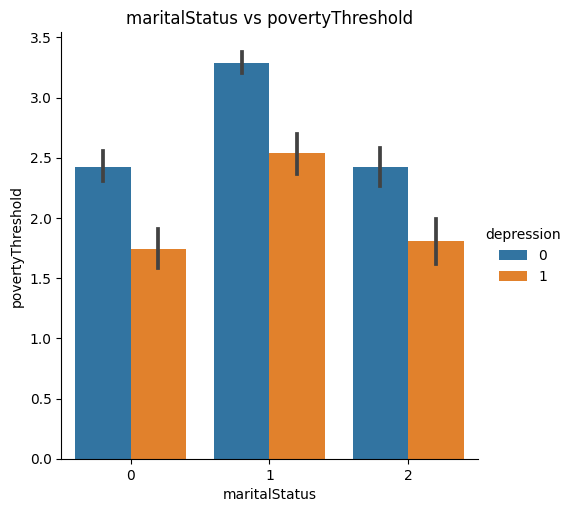

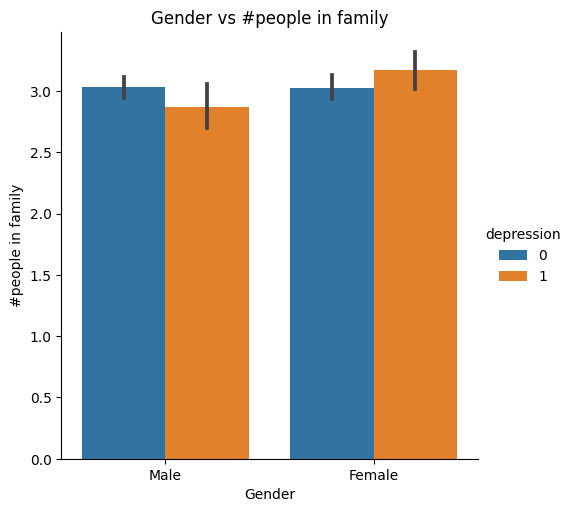

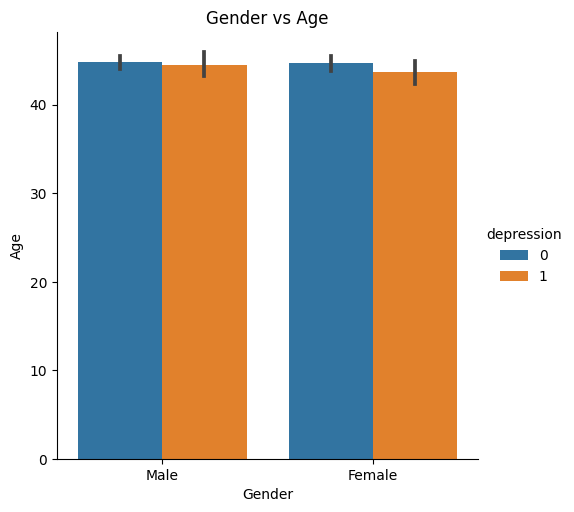

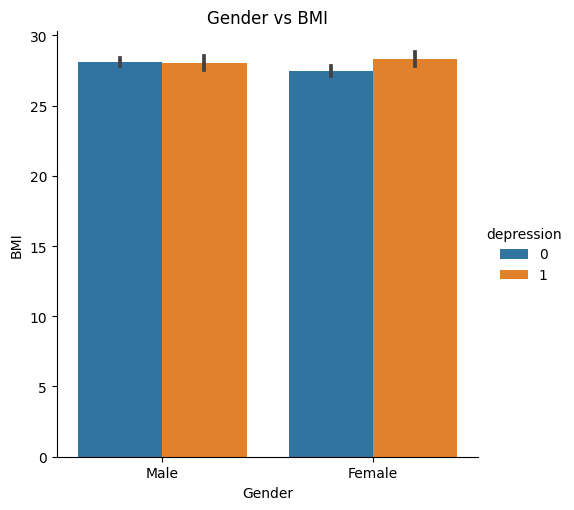

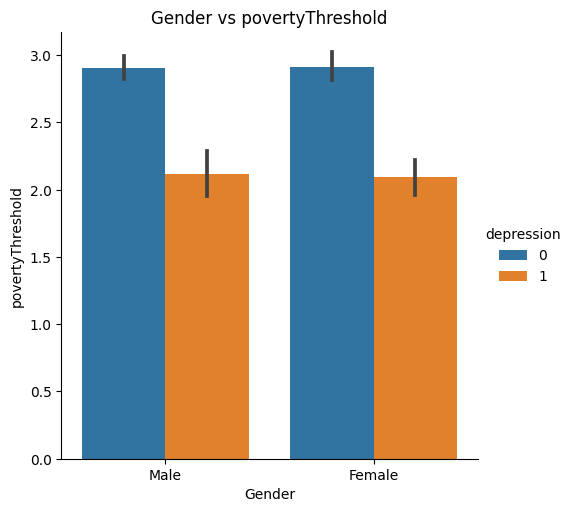

In [91]:
# Bivariate analysis of categorical variables
for cat in cat_vars:
  for num in num_vars:
    sns.catplot(x=cat, y=num, data=df, kind='bar',hue='depression')
    plt.title(cat + " vs " + num)
    plt.show()



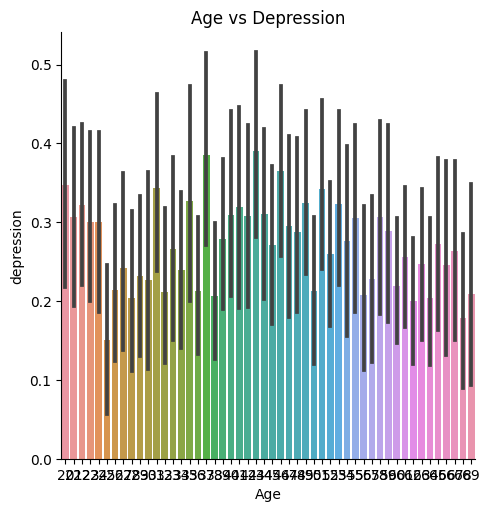

In [92]:
# Bivariate analysis of categorical variables

sns.catplot(x='Age', y='depression', data=df, kind='bar')
plt.title('Age vs Depression')
plt.show()

# Apply K-means with 5 clusters on Age column to create new feature 

In [93]:
from sklearn.cluster import KMeans
# Perform k-means clustering on the Age column
kmeans = KMeans(n_clusters=5)
df['age_cluster'] = kmeans.fit_predict(df[['Age']])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
# View the distribution of cluster labels
print(df['age_cluster'].value_counts())

2    742
3    732
0    597
4    557
1    555
Name: age_cluster, dtype: int64


In [95]:
# Define a dictionary to map the cluster labels to new names
cluster_names = {0: '20-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60-70'}

# Replace the cluster labels with the new names
df['age_cluster'] = df['age_cluster'].replace(cluster_names)

# View the updated cluster labels
print(df['age_cluster'].value_counts())

40-50    742
50-60    732
20-30    597
60-70    557
30-40    555
Name: age_cluster, dtype: int64


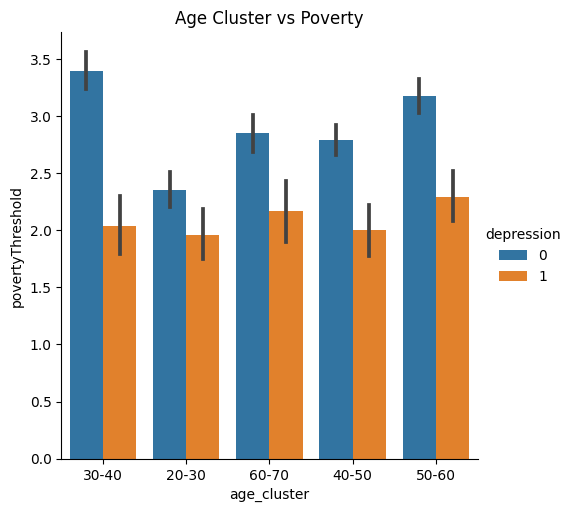

In [96]:
# Bivariate analysis of age-clusters and depression variables

sns.catplot(x='age_cluster', y='povertyThreshold', data=df, kind='bar',hue='depression')
plt.title('Age Cluster vs Poverty')
plt.show()

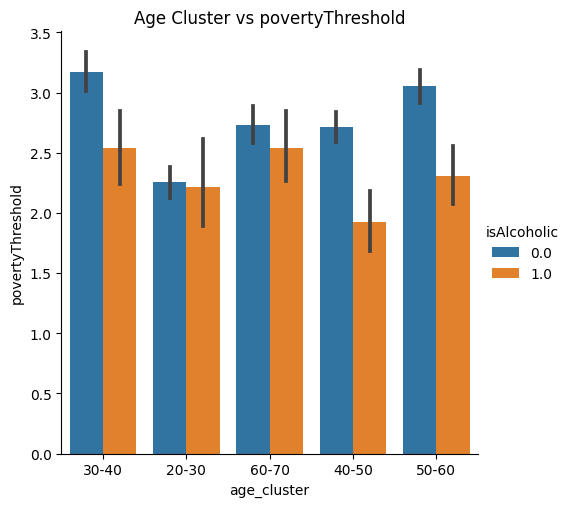

In [97]:
# Bivariate analysis of age-clusters and depression variables

sns.catplot(x='age_cluster', y='povertyThreshold', data=df, kind='bar',hue='isAlcoholic')
plt.title('Age Cluster vs povertyThreshold')
plt.show()

# Box plot (Numerical - Categorical)

<Axes: xlabel='depression', ylabel='Age'>

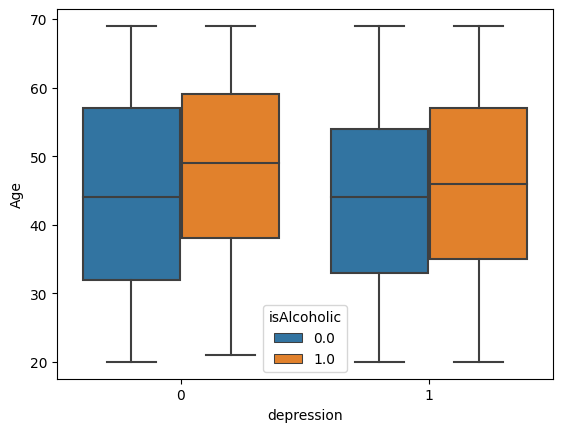

In [98]:
sns.boxplot(x=df['depression'],y=df['Age'],hue=df['isAlcoholic'])

<Axes: xlabel='maritalStatus', ylabel='povertyThreshold'>

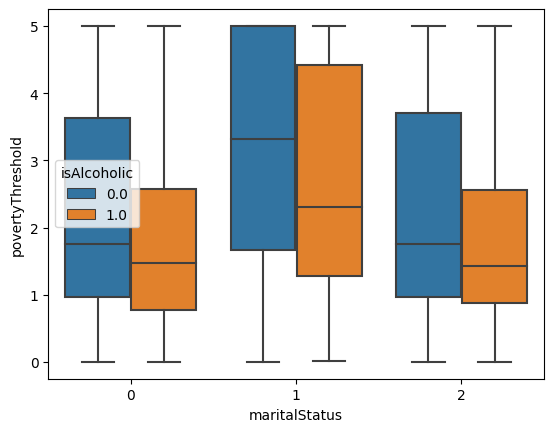

In [99]:
sns.boxplot(x=df['maritalStatus'],y=df['povertyThreshold'],hue=df['isAlcoholic'])

<Axes: xlabel='CompletedHighSchool', ylabel='povertyThreshold'>

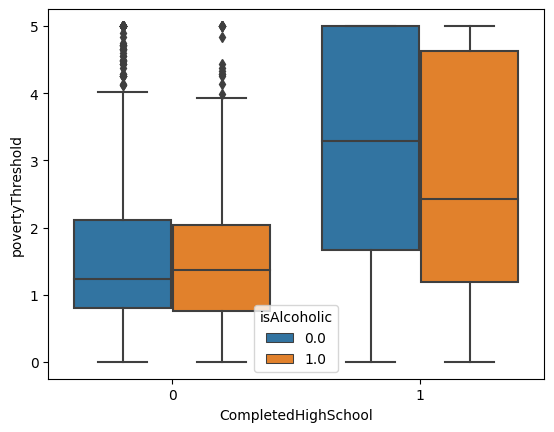

In [100]:
sns.boxplot(x=df['CompletedHighSchool'],y=df['povertyThreshold'],hue=df['isAlcoholic'])

<Axes: xlabel='CompletedHighSchool', ylabel='povertyThreshold'>

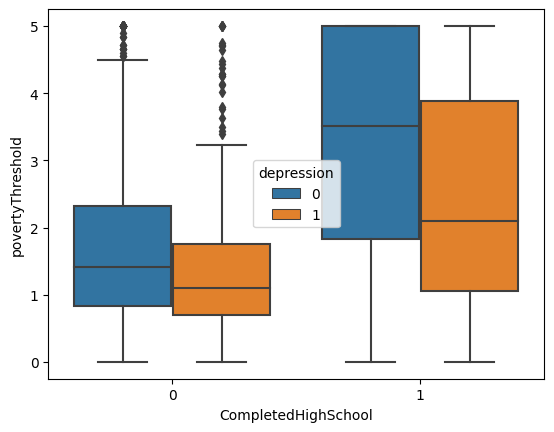

In [101]:
sns.boxplot(x=df['CompletedHighSchool'],y=df['povertyThreshold'],hue=df['depression'])

# Probability Density Function analysis

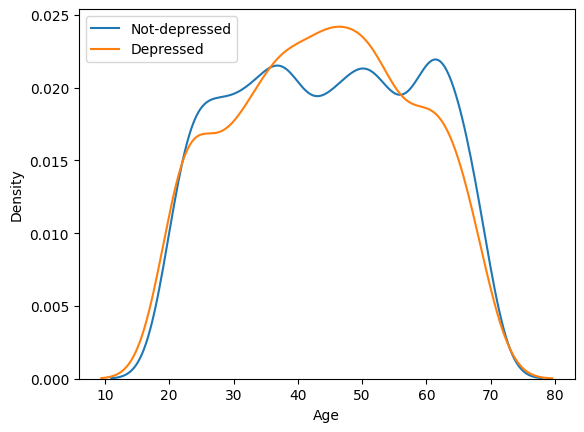

In [102]:
sns.kdeplot(df[df['depression']==0]['Age'],label='Not-depressed')
sns.kdeplot(df[df['depression']==1]['Age'],label='Depressed')
plt.legend()

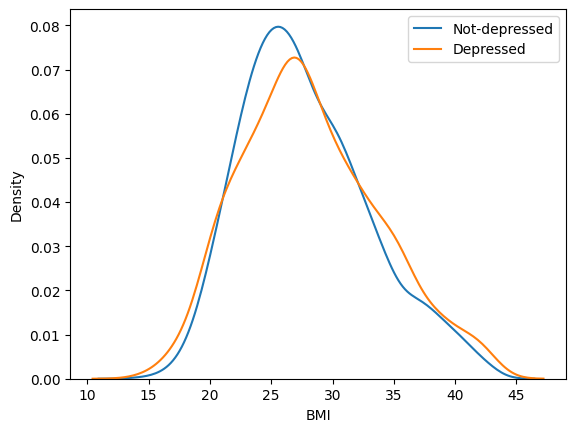

In [103]:
sns.kdeplot(df[df['depression']==0]['BMI'],label='Not-depressed')
sns.kdeplot(df[df['depression']==1]['BMI'],label='Depressed')
plt.legend()

# Heat Maps to understand variation of categories with respect to depression

<Axes: xlabel='depression-isAlcoholic', ylabel='finStatus-familySize'>

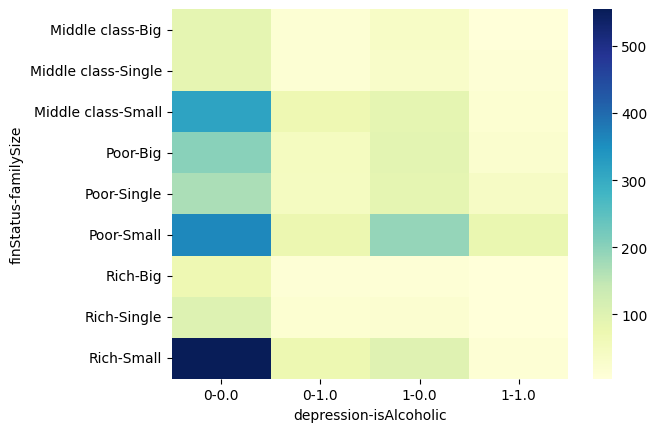

In [104]:
sns.heatmap(pd.crosstab([df['finStatus'],df['familySize']],[df['depression'],df['isAlcoholic']]),cmap="YlGnBu")

<Axes: xlabel='depression-isAlcoholic', ylabel='weightCategory'>

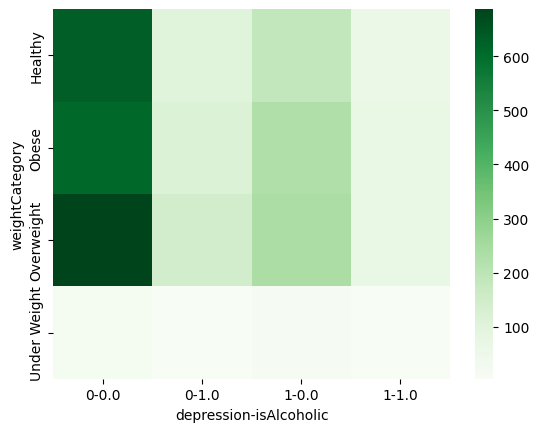

In [105]:
sns.heatmap(pd.crosstab([df['weightCategory']],[df['depression'],df['isAlcoholic']]),cmap="Greens")

<Axes: xlabel='depression', ylabel='isAlcoholic-Used Drugs'>

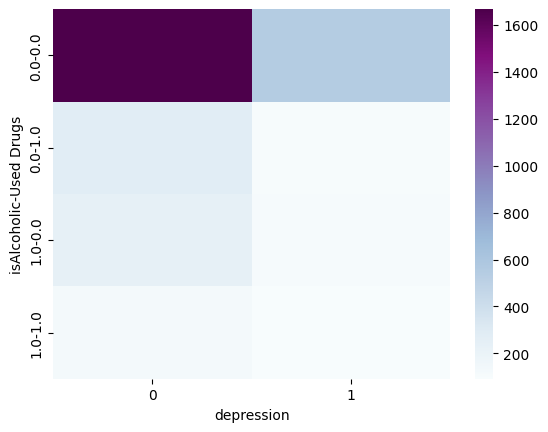

In [106]:
sns.heatmap(pd.crosstab([df['isAlcoholic'],df['Used Drugs']],[df['depression']]),cmap="BuPu")

# Percentage of people in each category suffering with depression

In [107]:
df.groupby('isAlcoholic').mean()['depression']*100

isAlcoholic
0.0    25.345092
1.0    35.304348
Name: depression, dtype: float64

In [108]:
df.groupby('Used Drugs').mean()['depression']*100

Used Drugs
0.0    25.816485
1.0    32.733224
Name: depression, dtype: float64

In [109]:
df.groupby('maritalStatus').mean()['depression']*100

maritalStatus
0    30.987514
1    22.036927
2    35.473515
Name: depression, dtype: float64

In [110]:
df.groupby('maritalStatus').mean()['isAlcoholic']*100

maritalStatus
0    17.139614
1    16.795712
2    22.792937
Name: isAlcoholic, dtype: float64

In [111]:
df.groupby('weightCategory').mean()['depression']*100

weightCategory
Healthy         24.923391
Obese           28.978389
Overweight      26.906223
Under Weight    40.000000
Name: depression, dtype: float64

In [112]:
df.groupby('CompletedHighSchool').mean()['depression']*100

CompletedHighSchool
0    34.177215
1    24.503025
Name: depression, dtype: float64

In [113]:
df.groupby('familySize').mean()['depression']*100

familySize
Big       28.618421
Single    31.338583
Small     25.309278
Name: depression, dtype: float64

In [114]:
df.groupby('finStatus').mean()['depression']*100

finStatus
Middle class    24.746193
Poor            36.395760
Rich            15.714286
Name: depression, dtype: float64

# Correlation matrix


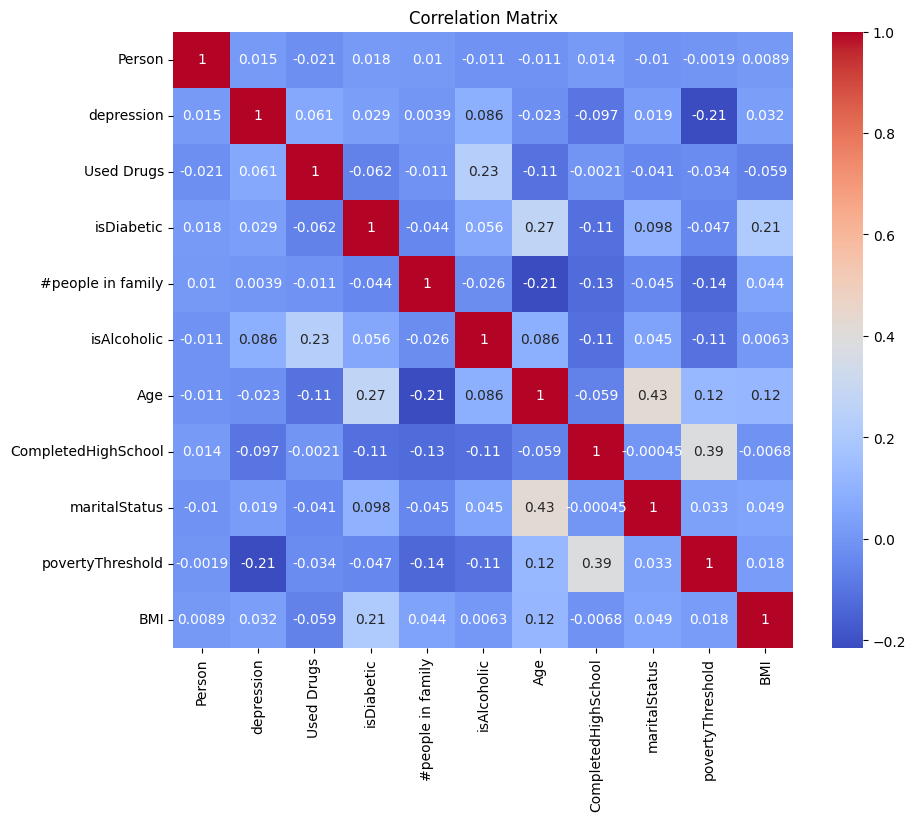

In [115]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()



# One Hot encoding on Gender

In [116]:
# Drop rows with NaN values
df = df.dropna()

# Verify that there are no more NaN values
print(df.isnull().sum())

Person                 0
depression             0
Used Drugs             0
isDiabetic             0
#people in family      0
isAlcoholic            0
Gender                 0
Age                    0
CompletedHighSchool    0
maritalStatus          0
povertyThreshold       0
BMI                    0
familySize             0
finStatus              0
weightCategory         0
age_cluster            0
dtype: int64


In [117]:
# apply one-hot encoding on gender column
one_hot_encoded_gender = pd.get_dummies(df['Gender'])

# add the one-hot encoded gender columns to the original dataframe
df = pd.concat([df, one_hot_encoded_gender], axis=1)

# remove the original gender column
df = df.drop('Gender', axis=1)

In [118]:
df.sample(5)

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus,weightCategory,age_cluster,Female,Male
2200,48033,0,0.0,0,2,0.0,58,1,1,5.00,24.412138,Small,Rich,Healthy,30-40,0,1
934,44254,0,0.0,0,3,1.0,23,1,0,4.08,22.784662,Small,Rich,Healthy,20-30,0,1
3380,51466,1,0.0,1,2,1.0,57,0,1,1.83,31.926499,Small,Poor,Obese,30-40,0,1
1170,44901,0,0.0,0,1,0.0,22,1,0,1.96,19.766230,Single,Poor,Healthy,20-30,1,0
1590,46120,1,0.0,0,2,0.0,61,1,1,5.00,28.057807,Small,Rich,Overweight,60-70,0,1


In [119]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Poor', 'Middle class', 'Rich']])

# Apply the encoder to the finStatus column
df['finStatus_encoded'] = encoder.fit_transform(df[['finStatus']])

df = df.drop('finStatus', axis=1)


In [120]:
df.sample(5)

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,weightCategory,age_cluster,Female,Male,finStatus_encoded
1871,47006,0,0.0,0,4,0.0,32,1,1,1.79,26.830390,Small,Overweight,40-50,1,0,0.0
1581,46100,0,0.0,0,1,0.0,35,1,0,5.00,30.131553,Single,Obese,40-50,0,1,2.0
83,41749,0,0.0,0,6,0.0,28,1,1,2.10,27.279596,Big,Overweight,20-30,1,0,1.0
877,44096,0,0.0,0,3,1.0,64,0,1,1.16,27.761241,Small,Overweight,60-70,0,1,0.0
3192,50964,1,0.0,0,3,0.0,24,1,0,3.69,24.940926,Small,Healthy,20-30,1,0,1.0


In [121]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
fam_encoder = OrdinalEncoder(categories=[['Single', 'Small', 'Big']])

# Apply the encoder to the finStatus column
df['familySize_encoded'] = fam_encoder.fit_transform(df[['familySize']])

df = df.drop('familySize', axis=1)


In [122]:
# apply one-hot encoding on weightCategory column
one_hot_encoded_wt = pd.get_dummies(df['weightCategory'])

# add the one-hot encoded weightCategory columns to the original dataframe
df = pd.concat([df, one_hot_encoded_wt], axis=1)

# remove the original weightCategory column
df = df.drop('weightCategory', axis=1)

In [123]:
df.sample(5)

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,age_cluster,Female,Male,finStatus_encoded,familySize_encoded,Healthy,Obese,Overweight,Under Weight
2514,48978,0,0.0,0,5,0.0,33,1,1,2.90,35.564916,40-50,0,1,1.0,2.0,0,1,0,0
1241,45116,0,0.0,0,4,0.0,43,1,1,3.63,22.295676,50-60,1,0,1.0,1.0,1,0,0,0
3386,51482,0,0.0,0,1,0.0,62,1,2,4.90,24.888938,60-70,1,0,2.0,0.0,1,0,0,0
3254,51141,0,0.0,0,3,0.0,48,1,0,1.40,30.409584,50-60,1,0,0.0,1.0,0,1,0,0
131,41927,1,0.0,0,2,0.0,38,1,1,3.57,19.158038,40-50,0,1,1.0,1.0,1,0,0,0


In [124]:
# remove the original age_cluster column
df = df.drop('age_cluster', axis=1)

In [125]:
print(df.dtypes)

Person                   int64
depression               int64
Used Drugs             float64
isDiabetic               int64
#people in family        int64
isAlcoholic            float64
Age                      int64
CompletedHighSchool      int64
maritalStatus            int64
povertyThreshold       float64
BMI                    float64
Female                   uint8
Male                     uint8
finStatus_encoded      float64
familySize_encoded     float64
Healthy                  uint8
Obese                    uint8
Overweight               uint8
Under Weight             uint8
dtype: object


# Logistic Regression

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.2, random_state=42)


In [128]:
# Create the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
# Create a dataframe to store the variable names and their coefficients
coef_df = pd.DataFrame(columns=['variable', 'coefficient'])

# Loop through the input variables and their coefficients
for i in range(len(X_train.columns)):
    coef_df.loc[i] = [X_train.columns[i], lr_model.coef_[0][i]]

# Sort the dataframe by the coefficients
coef_df = coef_df.reindex(coef_df['coefficient'].sort_values(ascending=False).index)

# Print the dataframe
print(coef_df)


               variable  coefficient
3           isAlcoholic     0.451669
4            Used Drugs     0.369235
9                Female     0.281925
11    finStatus_encoded     0.281771
7            isDiabetic     0.105315
15           Overweight     0.029675
5     #people in family     0.026875
2         maritalStatus     0.013502
0                   BMI     0.010270
1                   Age    -0.001572
16         Under Weight    -0.023327
14                Obese    -0.030366
6   CompletedHighSchool    -0.108176
12   familySize_encoded    -0.165930
13              Healthy    -0.196844
8      povertyThreshold    -0.415986
10                 Male    -0.502788


In [130]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7409733124018838


In [131]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion_matrix)

Confusion matrix:
[[450  18]
 [147  22]]


In [132]:
# Print the classification report
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.96      0.85       468
           1       0.55      0.13      0.21       169

    accuracy                           0.74       637
   macro avg       0.65      0.55      0.53       637
weighted avg       0.70      0.74      0.68       637



# Tuning logistic regression

In [133]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['isAlcoholic', 'Used Drugs', 'povertyThreshold','finStatus_encoded','familySize_encoded']], df['depression'], test_size=0.2, random_state=42)

# Create the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr_model.predict(X_test)

# Create a dataframe to store the variable names and their coefficients
coef_df = pd.DataFrame(columns=['variable', 'coefficient'])

# Loop through the input variables and their coefficients
for i in range(len(X_train.columns)):
    coef_df.loc[i] = [X_train.columns[i], lr_model.coef_[0][i]]

# Sort the dataframe by the coefficients
coef_df = coef_df.reindex(coef_df['coefficient'].sort_values(ascending=False).index)

# Print the dataframe
print(coef_df)



             variable  coefficient
0         isAlcoholic     0.255779
1          Used Drugs     0.234699
3   finStatus_encoded     0.221859
4  familySize_encoded    -0.063496
2    povertyThreshold    -0.405620


In [134]:
df['depression'].value_counts()

0    2319
1     864
Name: depression, dtype: int64

In [135]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7394034536891679


# Decision Trees

In [136]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.2, random_state=42)


# Create a decision tree classifier with a maximum depth of 3
dt_model = DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.717425431711146


In [137]:
# Get the feature importances from the trained model
importances = dt_model.feature_importances_

# Create a dictionary to store the feature importances with their corresponding names
feature_importances = {}
for feature_name, importance in zip(X_train.columns, importances):
    feature_importances[feature_name] = importance

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances in descending order
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


povertyThreshold: 0.6276648390897498
Female: 0.21331059904124353
BMI: 0.10593564586052202
isAlcoholic: 0.05308891600848479
Age: 0.0
maritalStatus: 0.0
Used Drugs: 0.0
#people in family: 0.0
CompletedHighSchool: 0.0
isDiabetic: 0.0
Male: 0.0
finStatus_encoded: 0.0
familySize_encoded: 0.0
Healthy: 0.0
Obese: 0.0
Overweight: 0.0
Under Weight: 0.0


In [138]:
from sklearn.metrics import classification_report


# Print the classification report
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       468
           1       0.41      0.15      0.22       169

    accuracy                           0.72       637
   macro avg       0.58      0.54      0.52       637
weighted avg       0.66      0.72      0.67       637



[Text(0.5, 0.875, 'x[8] <= 1.415\ngini = 0.397\nsamples = 2546\nvalue = [1851, 695]'),
 Text(0.25, 0.625, 'x[9] <= 0.5\ngini = 0.483\nsamples = 783\nvalue = [463, 320]'),
 Text(0.125, 0.375, 'x[3] <= 0.5\ngini = 0.449\nsamples = 394\nvalue = [260, 134]'),
 Text(0.0625, 0.125, 'gini = 0.41\nsamples = 267\nvalue = [190, 77]'),
 Text(0.1875, 0.125, 'gini = 0.495\nsamples = 127\nvalue = [70, 57]'),
 Text(0.375, 0.375, 'x[0] <= 25.927\ngini = 0.499\nsamples = 389\nvalue = [203, 186]'),
 Text(0.3125, 0.125, 'gini = 0.468\nsamples = 147\nvalue = [92, 55]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 242\nvalue = [111, 131]'),
 Text(0.75, 0.625, 'x[9] <= 0.5\ngini = 0.335\nsamples = 1763\nvalue = [1388, 375]'),
 Text(0.625, 0.375, 'x[0] <= 22.463\ngini = 0.273\nsamples = 957\nvalue = [801, 156]'),
 Text(0.5625, 0.125, 'gini = 0.42\nsamples = 90\nvalue = [63, 27]'),
 Text(0.6875, 0.125, 'gini = 0.253\nsamples = 867\nvalue = [738, 129]'),
 Text(0.875, 0.375, 'x[8] <= 4.275\ngini = 0.396\nsamp

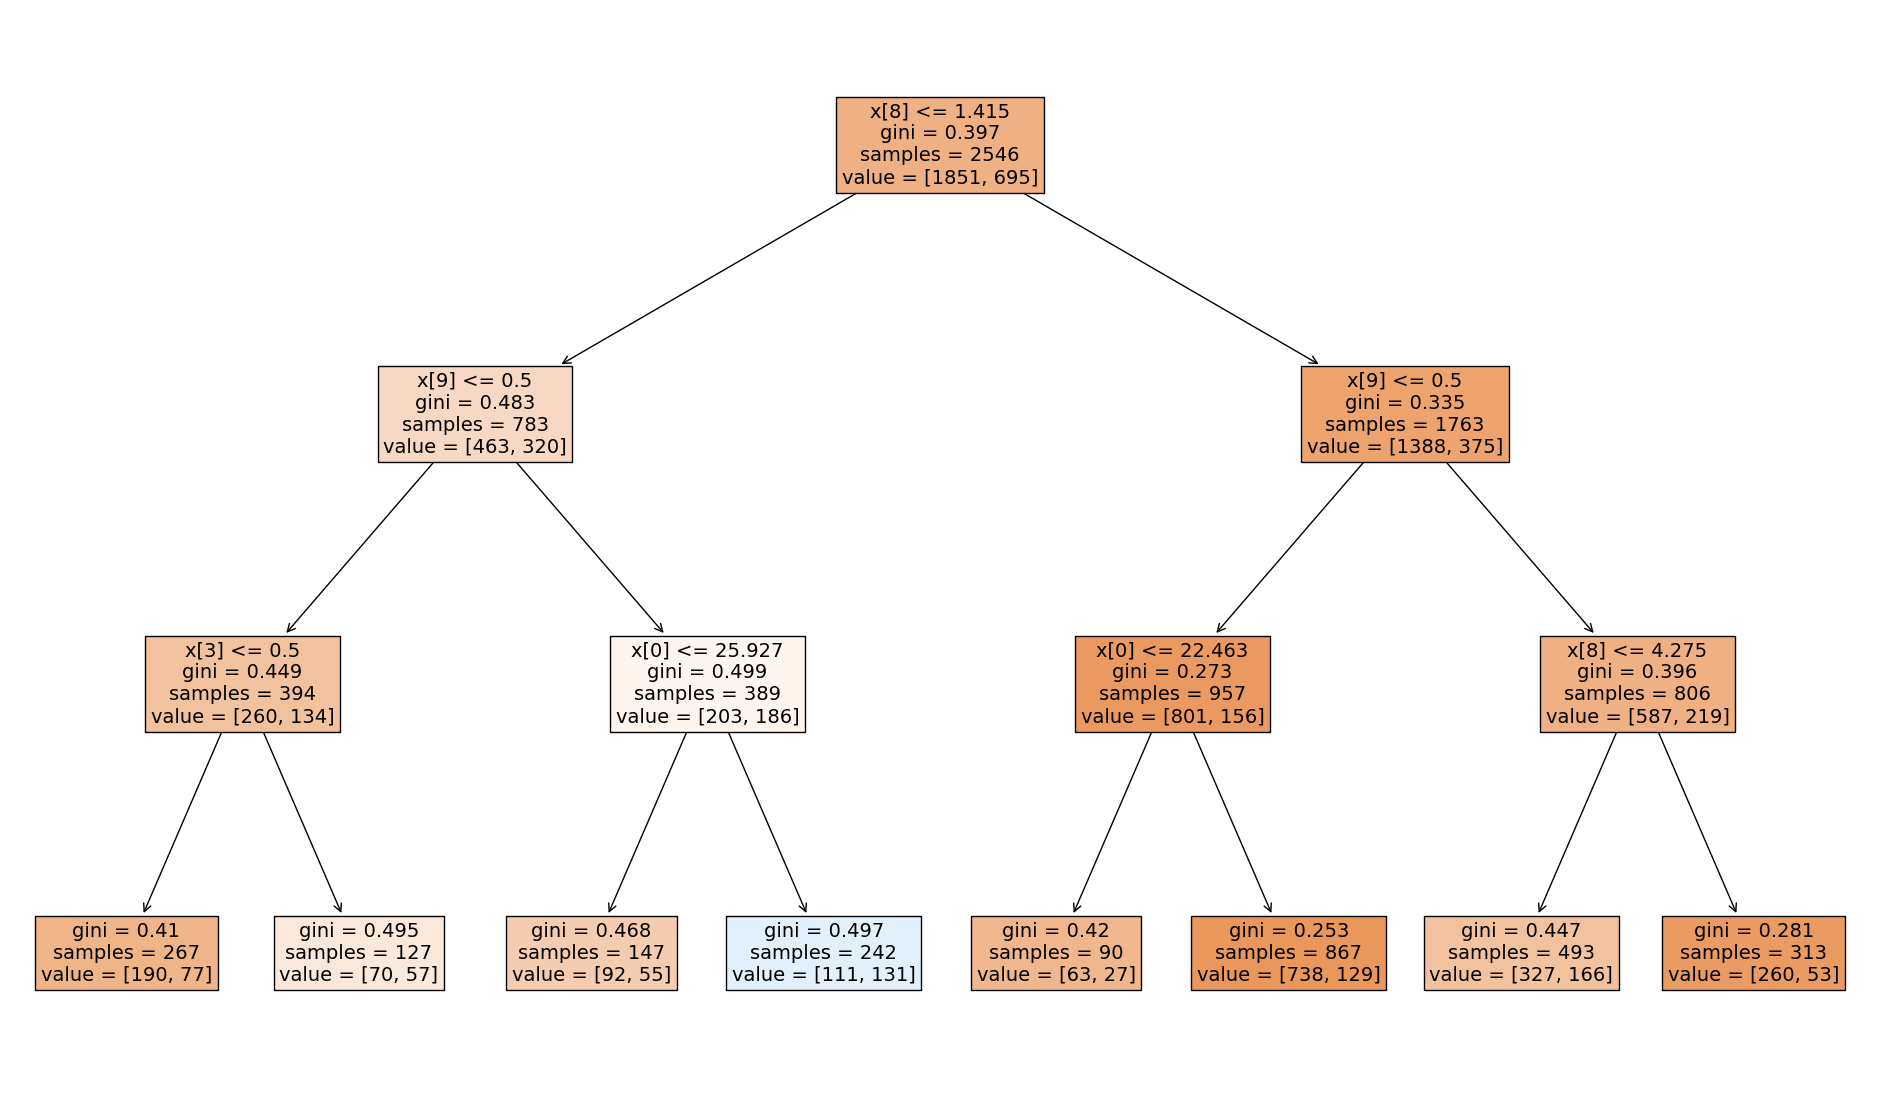

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize=(24,14))
tree.plot_tree(dt_model, filled=True, fontsize=14)

In [140]:
import warnings
from sklearn.exceptions import DataConversionWarning
# Suppress future warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [141]:

from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease':[0.1,0.15,0.2,0.3]
}

# create the grid search object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters and the corresponding f1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.0


In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.2, random_state=42)


# Create a decision tree classifier with a maximum depth of 3
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, max_features='auto', 
                                  min_samples_leaf= 1, min_samples_split= 2,min_impurity_decrease=0.1)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7346938775510204


# Support Vector Machines

In [143]:
from sklearn.svm import SVC

# Split the data into training and testing sets
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.1, random_state=42)

# Create the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42,probability=True)

# Train the model on the training data
svm_model.fit(X_trainsvm, y_trainsvm)

# Predict the target variable for the test data
y_predsvm = svm_model.predict(X_testsvm)




In [144]:
# Evaluate the model using accuracy score
svm_accuracy = accuracy_score(y_testsvm, y_predsvm)
print('Accuracy:', svm_accuracy)

Accuracy: 0.7492163009404389


In [145]:
importance = abs(svm_model.coef_[0])
feature_names = X_trainsvm.columns

# create a dictionary of feature names and their importance scores
feature_importance = dict(zip(feature_names, importance))

# sort the features by importance in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# print the sorted list of features and their importance scores
for feature, importance_score in sorted_features:
    print(feature, importance_score)


isAlcoholic 0.002377754156498213
povertyThreshold 0.0021148379843274334
Used Drugs 0.002083042410845337
finStatus_encoded 0.002038218010284254
Male 0.0016444251198777238
Female 0.0016444251198208804
Healthy 0.0005618371680498058
isDiabetic 0.00042203051150124793
Overweight 0.00041493264120617823
CompletedHighSchool 0.00031548312381346477
Under Weight 0.00030774275587397426
#people in family 0.00028955722655155114
familySize_encoded 0.0002480676212144317
Obese 0.00016083822924883862
Age 4.5791370212100446e-05
BMI 1.535663207619109e-05
maritalStatus 1.6137137208716013e-06


In [146]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_testsvm, y_predsvm,zero_division=0))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       239
           1       0.00      0.00      0.00        80

    accuracy                           0.75       319
   macro avg       0.37      0.50      0.43       319
weighted avg       0.56      0.75      0.64       319



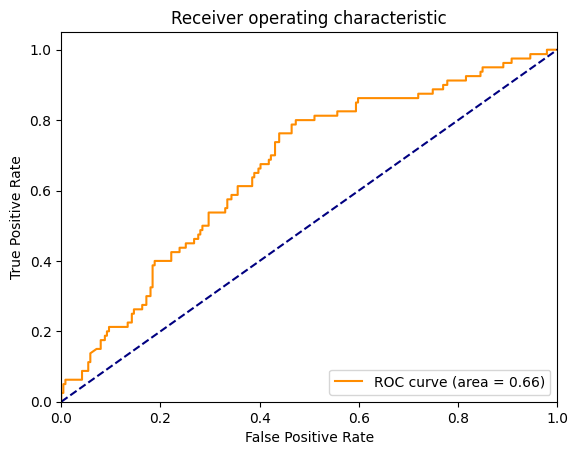

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already predicted the probabilities for the test data
y_pred_proba = svm_model.predict_proba(X_testsvm)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_testsvm, y_pred_proba)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_testsvm, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

# Create the SVM model
svm_model = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)


# Evaluate the model on the test data
y_pred = grid_search.predict(X_test_norm)
print(classification_report(y_test, y_pred))



Best hyperparameters: {'C': 10, 'degree': 4, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       468
           1       0.34      0.21      0.26       169

    accuracy                           0.68       637
   macro avg       0.54      0.53      0.53       637
weighted avg       0.64      0.68      0.65       637



# KNN Classfier

# Finding Optimal K value

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.1, random_state=42)


# Define a range of k values to test
k_range = range(1, 15)

# Create an empty list to store the cross-validation scores
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k value that gives the highest cross-validation score
optimal_k = k_range[cv_scores.index(max(cv_scores))]

print(optimal_k)

10


In [150]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn_model.predict(X_test)


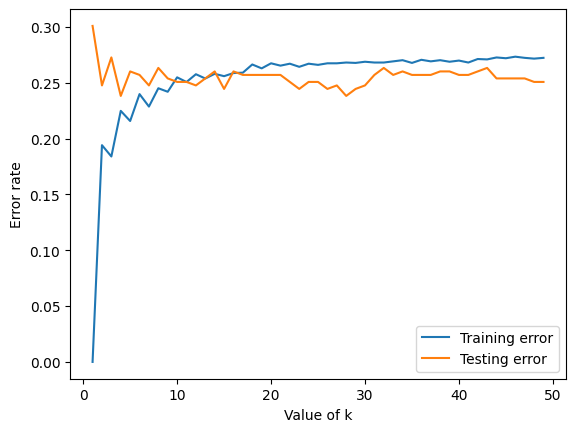

In [151]:
# Loop over the k values and calculate the error rate for each k
# Initialize empty lists to store the error rates
train_errors = []
test_errors = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(X_test, y_test))

# Plot the error rates vs k
plt.plot(range(1,50), train_errors, label='Training error')
plt.plot(range(1,50), test_errors, label='Testing error')
plt.xlabel('Value of k')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [152]:

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7492163009404389


In [153]:

# Print the classification report
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       239
           1       0.50      0.09      0.15        80

    accuracy                           0.75       319
   macro avg       0.63      0.53      0.50       319
weighted avg       0.70      0.75      0.68       319



In [154]:
from sklearn.decomposition import PCA

# Fit PCA on training data
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)

# Apply PCA on test data
X_test_pca = pca.transform(X_test)

# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model on the reduced training data
knn_model.fit(X_train_pca, y_train)

# Predict the target variable for the reduced test data
y_pred = knn_model.predict(X_test_pca)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.97      0.86       239
           1       0.56      0.11      0.19        80

    accuracy                           0.76       319
   macro avg       0.66      0.54      0.52       319
weighted avg       0.71      0.76      0.69       319



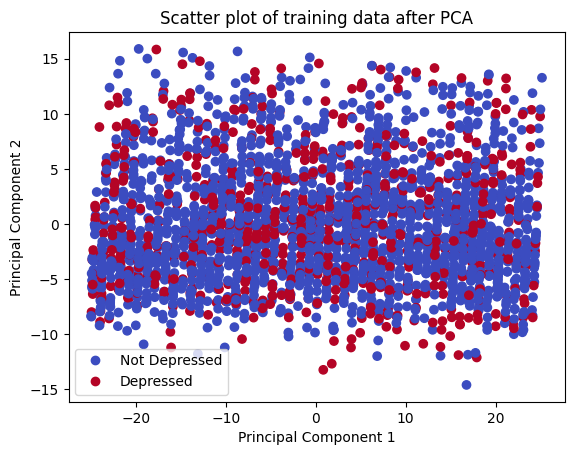

In [155]:
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')

# add legend
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Depressed', 'Depressed'])

# add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of training data after PCA')

plt.show()

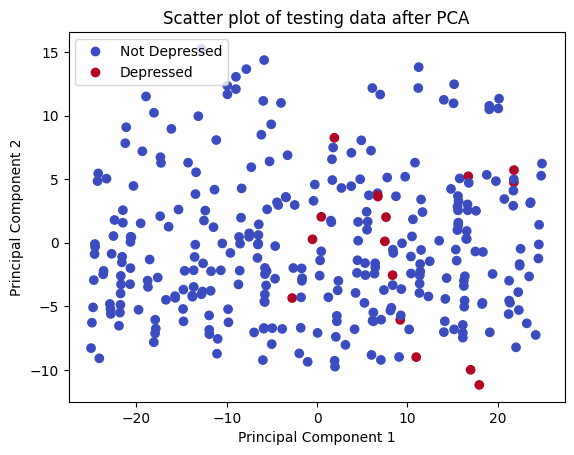

In [156]:
# create scatter plot
# plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm')

# add legend
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Depressed', 'Depressed'])

# add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of testing data after PCA')

plt.show()

**Naive Bayes**

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create a Naive Bayes classifier object
nb = GaussianNB()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['BMI','Age','maritalStatus', 'isAlcoholic', 'Used Drugs', '#people in family', 'CompletedHighSchool', 'isDiabetic', 'povertyThreshold','Female','Male','finStatus_encoded','familySize_encoded','Healthy','Obese','Overweight','Under Weight']], df['depression'], test_size=0.1, random_state=42)


# fit the classifier on the training data
nb.fit(X_train, y_train)

# make predictions on the testing data
y_pred = nb.predict(X_test)

# evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6927899686520376


In [167]:
#finding the impact of each feature on output
importances = []
for feature in X_test.columns:
    X_test_permuted = X_test.copy()
    X_test_permuted[feature] = np.random.permutation(X_test[feature])
    y_pred_permuted = clf.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_pred_permuted)
    importances.append(accuracy - accuracy_permuted)

# rank the features based on their importance scores
importances_df = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)
print(importances_df)

                feature  importance
3           isAlcoholic    0.021944
6   CompletedHighSchool    0.009404
9                Female    0.006270
16         Under Weight    0.000000
15           Overweight    0.000000
14                Obese    0.000000
7            isDiabetic    0.000000
12   familySize_encoded    0.000000
13              Healthy   -0.003135
0                   BMI   -0.003135
1                   Age   -0.003135
2         maritalStatus   -0.009404
5     #people in family   -0.012539
10                 Male   -0.015674
4            Used Drugs   -0.021944
11    finStatus_encoded   -0.028213
8      povertyThreshold   -0.031348


In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       239
           1       0.38      0.38      0.38        80

    accuracy                           0.69       319
   macro avg       0.59      0.59      0.59       319
weighted avg       0.69      0.69      0.69       319



In [173]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# create a Naive Bayes classifier object
tunednb = GaussianNB()

params = {'var_smoothing': uniform(0, 1)}

# create a random search object
random_search = RandomizedSearchCV(tunednb, params, cv=5, n_iter=10)

# fit the random search object on the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters and their corresponding score
print(random_search.best_params_)
print(random_search.best_score_)

# evaluate the performance of the model with the best hyperparameters on the testing data
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


{'var_smoothing': 0.12292445512839745}
0.7262573377756624
Test accuracy: 0.7492163009404389
